# Ideal and Non-ideal Solutions

## Motivation

Solutions are composed of two or more homogeneously mixed components.  *Ideal* solutions are ones that are homogenously mixed and that follow *Raoult's law*.  Most solutions, however, are non-ideal.  In these notes we will discuss how to compute Thermodynamic quantitites for ideal and non-ideal solutions.

## Learning Goals

After working through these notes, you will be able to:

1. Define an ideal solution
2. Using Rault's law to relate mole fraction and partial pressure for an ideal solution
3. Compute $\Delta G_{mix}$ and $\Delta S_{mix}$ for ideal solutions give mole fraction information
4. Compute the Henry's law constant from $P(x_1)$ information

## Coding Concepts

The following coding concepts are used in this notebook:

1. [Variables](../../coding_concepts/variables.ipynb)
2. [Functions](../../coding_concepts/functions.ipynb)
3. [Plotting with matplotlib](../../coding_concepts/plotting_with_matplotlib.ipynb)

## Ideal Solutions

An *ideal solution* is one in which the partial pressure of each component is proportional to its mole fraction, or 
\begin{equation}
P_j = x_j P_j^*.
\end{equation}

The above equation is called *Raoult's law* so an ideal solution is one which obeys Raoult's law.  Ideal solutions are composed of similar (similar in size and molecular nature) species such as benzene and toluene. The similarity in species leads to similar intermolecular interactions.  This will also lead to a uniform distribution of species across the entire solution (another description of an ideal solution). 

Rault's law can be used to express the chemical potential of components of an ideal solution as a function of the mole fraction of that component.  Starting with the chemical potential of component $i$ as
\begin{equation}
\mu^{sln}_i = \mu^{*}_i(l) + RT\ln\frac{P_i}{P_i^*}
\end{equation}
we substitute Rault's law for $P_i$ to get
\begin{equation}
\mu^{sln}_i = \mu^{*}_i(l) + RT\ln\frac{x_i P_i^*}{P_i^*} = \mu^{*}_i(l) + RT\ln x_i
\end{equation}

### Example: Pressures above Ideal Solutions

1-propanol and 2-propanol form an ideal solution at 25$^\circ$C.  The pressure of pure 1-proponal is $P_1^*=20.9$ torr and that of 2-propanol is $P_2^* =45.2$ torr.  Plot the partial pressures and total pressures as a function of $x_1$ the mole fraction of 1-propanol.

We will use the equation the following equations:

\begin{eqnarray}
P_1 &=& x_1P_1* \\
P_2 &=& (1-x_1)P_2* \\
P_{total} &=& x_1P_1* + (1-x_1)P_2*
\end{eqnarray}

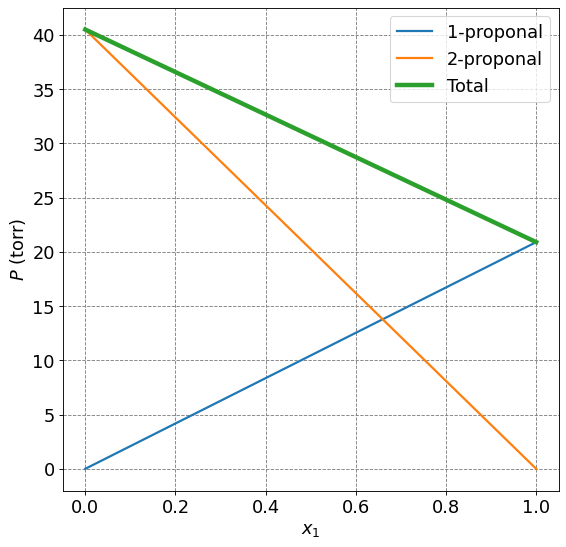

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# setup plot parameters
fontsize=16
fig = plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_xlabel("$x_1$",size=fontsize)
ax.set_ylabel("$P$ (torr)",size=fontsize)
plt.tick_params(axis='both',labelsize=fontsize)
# draw lines
x1 = np.arange(0,1.01,0.01)
P1 = 20.9*x1
P2 = 40.5*(1-x1)
Ptotal = P1+P2
ax.plot(x1,P1,lw=2,label="1-proponal")
ax.plot(x1,P2,lw=2,label="2-proponal")
ax.plot(x1,Ptotal,lw=4,label="Total")
plt.legend(fontsize=fontsize)

### The mole fraction in the liquid and vapor phases can be different

The mole fraction of a component of the vapor, $y_i$, can be determined by Dalton's law of partial pressure
\begin{equation}
y_i = \frac{P_i}{P_{total}}
\end{equation}

Using Rault's law we can substitute $P_i = x_iP_i^*$ we get
\begin{equation}
y_i = \frac{xP_i^*}{P_{total}}
\end{equation}

Because of the potential difference in partial pressures due to the pure liquid the mole fractions in the liquid phase, $x_i$, are not necessarily equal to the mole fractions in the vapor phase, $y_i$.  

### Example: Mole Fractions of 1-propanol and 2-propanol in Vapor and in Liquid

Make a plot of total pressure as a function of mole fraction of 1-propanol in the liquid and in the vapor phase of the previous example

Text(0.1, 30, 'Vapor')

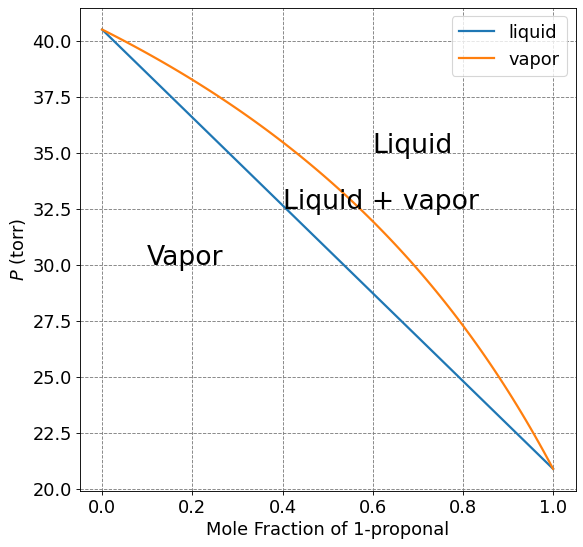

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# setup plot parameters
fontsize=16
fig = plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_xlabel("Mole Fraction of 1-proponal",size=fontsize)
ax.set_ylabel("$P$ (torr)",size=fontsize)
plt.tick_params(axis='both',labelsize=fontsize)
# draw lines
x1 = np.arange(0,1.01,0.01)
P1 = 20.9*x1
P2 = 40.5*(1-x1)
Ptotal_liquid = P1+P2
y1 = P1/Ptotal_liquid
Ptotal_vapor = 20.9*y1 + 40.5*(1-y1)
ax.plot(x1,Ptotal_liquid,lw=2,label="liquid")
ax.plot(x1,Ptotal_vapor,lw=2,label="vapor")
plt.legend(fontsize=fontsize)
# Annotations
plt.annotate("Liquid",(0.6,35),fontsize=24)
plt.annotate("Liquid + vapor",(0.4,32.5),fontsize=24)
plt.annotate("Vapor",(0.1,30),fontsize=24)

### Free Energy of Mixing Ideal Solutions

The Gibbs free energy of mixing of a binary ideal solution at constant $T$ and $P$ can be computed as follows
\begin{eqnarray}
\Delta G_{mix}  &=& G^{sln}(T,P,n_1,n_2) - G_1^*(T,P,n_1) - G_2^*(T,P,n_2) \\
    &=& n_1\mu_1^{sln} + n_2\mu_2^{sln} - n_1\mu_1^* - n_2\mu_2^* \\
    &=& RT(n_1\ln x_1 + n_2\ln x_2)
\end{eqnarray}

Entropy of mixing can be computed ass the temperature derivative of $\Delta G_{mix}$:
\begin{eqnarray}
\Delta S_{mix} = -\left( \frac{\partial \Delta G_{mix}}{\partial T} \right)_{P,n_1,n_2} = -R(n_1\ln x_1 + n_2\ln x_2)
\end{eqnarray}

The volume change upon mixing is zero for ideal solutions
\begin{equation}
\Delta V_{mix} = \left( \frac{\partial \Delta G_{mix}}{\partial P}\right)_{T,n_1,n_2} = 0
\end{equation}

The enthalpy change of mixing is also zero for ideal solutions

\begin{equation}
\Delta H_{mix} = \Delta G_{mix} - T\Delta S_{mix} = 0
\end{equation}

## Non-Ideal Solutions

Most Solutions are not ideal, meaning there is an imbalance in molecular size and/or intermolecular interactions between the species.  This leads to distinct behavior from Raoult's law for each component as the mole fraction of that component deviates from $1$.  This can be written mathematically as
\begin{eqnarray}
P_i &\rightarrow& x_iP_i^* \quad\text{as}\quad x_i\rightarrow 1 \\
P_i &\rightarrow& x_ik_{H,i} \quad\text{as}\quad x_i\rightarrow 0 
\end{eqnarray}
This last relationship is called *Henry's law* and $k_{H,i}$ is the Henry's law constant for component $i$.  The value of $k_{H,i}$ reflects the intermolecular interactions between species $i$ and the other components of the solution.  

### Example: Compute Henry's Law Constant

The vapor pressure for one component of a binary solution is given as
\begin{equation}
P_1  = 180 x_1e^{x_2^2+\frac{1}{2}x_2^3}
\end{equation}
Determine the Henry's law constant for this component.

We calculate the Henry's law constant by taking the limit of $P_1$ as $x_1$ goes to zero:
\begin{eqnarray}
k_{H,1} &=& \lim_{x_1\rightarrow0} \frac{P_1}{x_1} \\
&=& \lim_{x_1\rightarrow0} 180 e^{x_2^2+\frac{1}{2}x_2^3} \\
&=& 180\lim_{x_1\rightarrow0}   e^{(1-x_1)^2+\frac{1}{2}(1-x_1)^3} \\
&=& 180   e^{1+\frac{1}{2}} \\
&=& 180e^{\frac{3}{2}}\\
&\approx& 807 \quad \text{torr}
\end{eqnarray}

## Vapor Pressures Above Solutions can be Related Using Gibbs-Duhem

Much like the case of the the chemical potentials of solutions, the vapor pressures above solutions can be related using the Gibbs-Duhem equation.  This can be seen from the following relationships for a binary solution
\begin{eqnarray}
\mu_1 &=& \mu_1^0 + RT\ln P_1 \\
\mu_2 &=& \mu_2^0 + RT\ln P_2 
\end{eqnarray}
and the Gibbs-Duhem relationship that
\begin{equation}
d\mu_2 = -\frac{x_1}{x_2}d\mu_2.
\end{equation}

The first set of equations can be solved for $P_1$ and $P_2$ in terms of $\mu_1$ and $\mu_2$, respectively.  So one can measure the partial pressure of one species as a function of composition and determine the partial pressure as a function of composition using these relationships.